In [1]:
#In this project I will segment bank customers based on their Credit Score, Age and Number of banking products that they own.
#I will use KMeans segmentation and affinity propagation to identify the correct number of clusters
#Besides this, I will use different visualization technique to better understand if Gender or Geography have any influence on credit score.

##Result: Affinity Propagation seem to indicate a larger number of cluster as being more suited, vs. K-means. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [2]:
dp = pd.read_csv('../input/bank-customer-segmentation-kmeans-affinity/Bank Customer Segmentation.csv')
dp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,5,1,1,79084.10,0


In [3]:
#We drop the first 3 coloumns as they all refer to the same customer.
dp = dp.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
dp.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,5,1,1,79084.10,0


In [4]:
dp.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
dp.nunique()

CreditScore        352
Geography            3
Gender               2
Age                 59
Tenure              10
Balance            626
NumOfProducts        9
HasCrCard            2
IsActiveMember       2
EstimatedSalary    962
Exited               2
dtype: int64

In [6]:
dp.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
dp.shape

(962, 11)

In [8]:
print("Unique values in each categorical column:")
for col in dp.select_dtypes(include=[object]):
    print(col,":", dp[col].unique())

Unique values in each categorical column:
Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [9]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="CreditScore",y="NumOfProducts", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="CreditScore", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="NumOfProducts", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

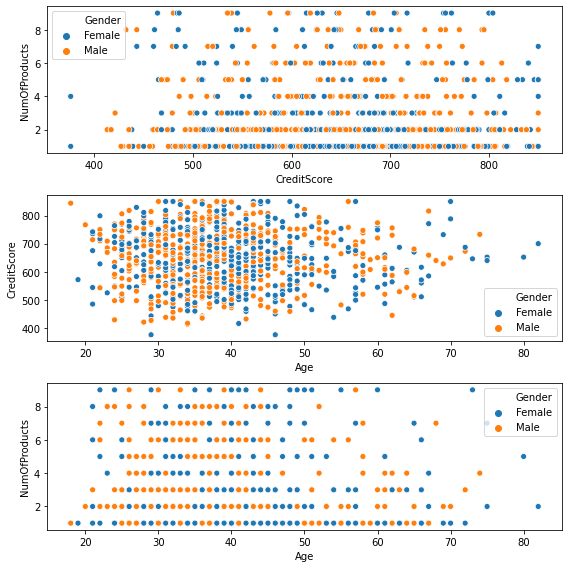

In [10]:
scatters(dp, h="Gender")
#Gender does not seem to make any differences in terms of credit score, no. of products or age.

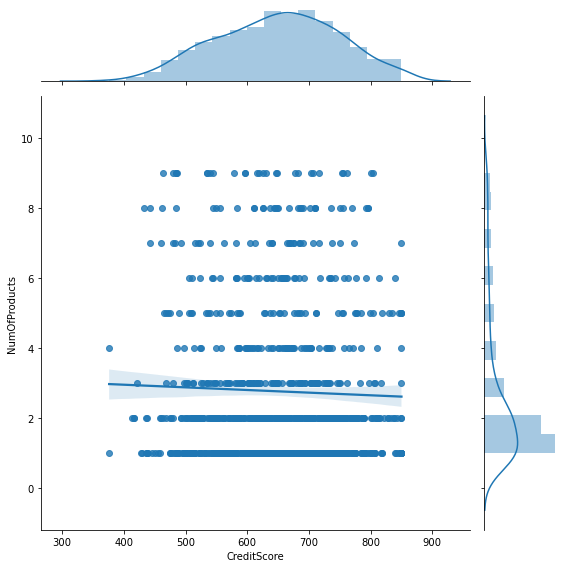

In [11]:
#Let us check the linear correlation between credit score and no. of products.
import scipy.stats as stats
r1 = sns.jointplot(x="CreditScore",y="NumOfProducts", data=dp, kind="reg", height=8)
plt.show()
#A small tendency exists of having a lower credit score as you increase the number of products.
#The logic is that as you take more banking credits or products and become more indebted to the bank, your overall suitability for another new credit decreases.

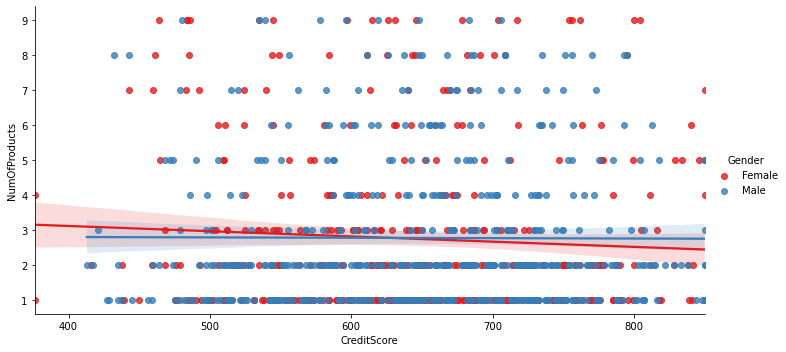

In [12]:
sns.lmplot(x="CreditScore",y="NumOfProducts", hue="Gender", data=dp, palette="Set1", aspect=2)
plt.show()
#Gender does not have any impact on this relationship between no. of products and gender.

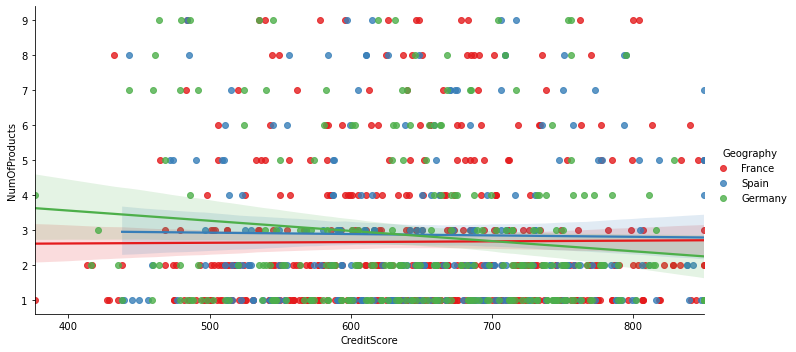

In [13]:
sns.lmplot(x="CreditScore",y="NumOfProducts", hue="Geography", data=dp, palette="Set1", aspect=2)
plt.show()
#Only customers from Germany seem to differentiate as they have a stronger relationship between no. of products and gender.

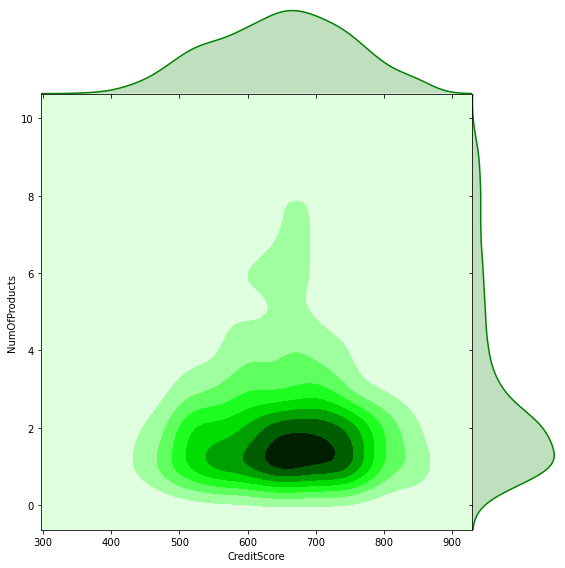

In [14]:
#Kernel Density Estimation: I`m using KDE here in order to better evaluate the probability density of our variiables.
#This is a more powerful technique, compared to normal histograms, to better understand the data.
sns.jointplot(x="CreditScore",y="NumOfProducts", data=dp, kind="kde", space=0, color="g",  height=8)
plt.show()

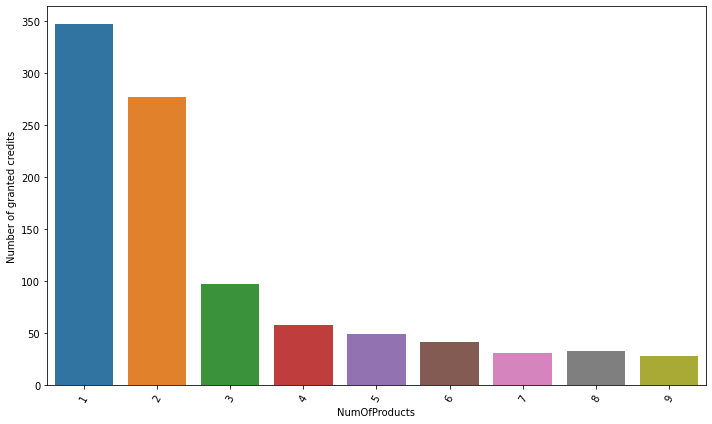

In [15]:
#By grouping the customers, it can be observed that most credits were given for customers with 1 or 2 products.
n_credits = dp.groupby("NumOfProducts")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="NumOfProducts",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

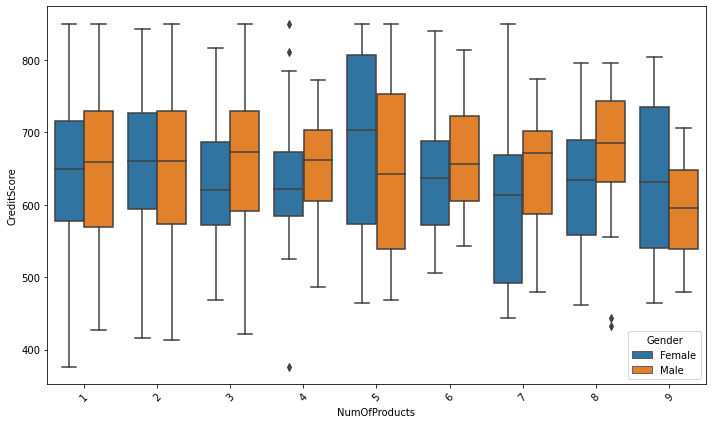

In [16]:
#Let us firther exploire our variables by using different boxplots.
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=dp)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()
boxes("NumOfProducts","CreditScore","Gender")
#Insight: It can be observed that as the number of products increase so does the credit score differences between males and females.

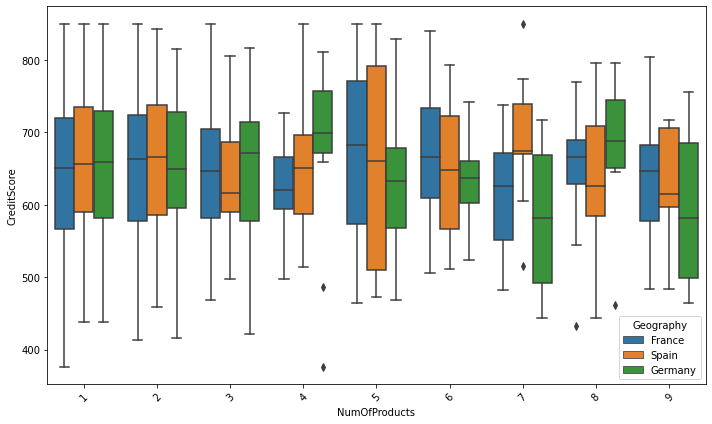

In [17]:
boxes("NumOfProducts","CreditScore","Geography")

#Insight: It can be observed that as the number of products increase so does the credit score differences between different geographic locations.

Text(0.5, 0, 'Age')

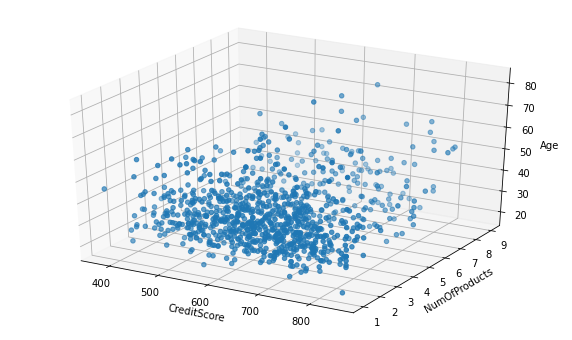

In [18]:
#3D representation for creditscore and no of products.
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dp["CreditScore"], dp["NumOfProducts"], dp["Age"])
ax.set_xlabel("CreditScore")
ax.set_ylabel("NumOfProducts")
ax.set_zlabel("Age")

In [19]:
##Clustering with KMeans.
##I will a subset containing only numerical variables (Age, CreditScore, Number of products).
##Then I will create distribution histograms, standardize the variables through logarithmic transformation and then rescale them as required by k-means clustering.
selected_cols = ["Age","CreditScore", "NumOfProducts"]
cluster_data = dp.loc[:,selected_cols]

In [20]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["CreditScore"], ax=ax2)
    sns.distplot(df["NumOfProducts"], ax=ax3)
    plt.tight_layout()

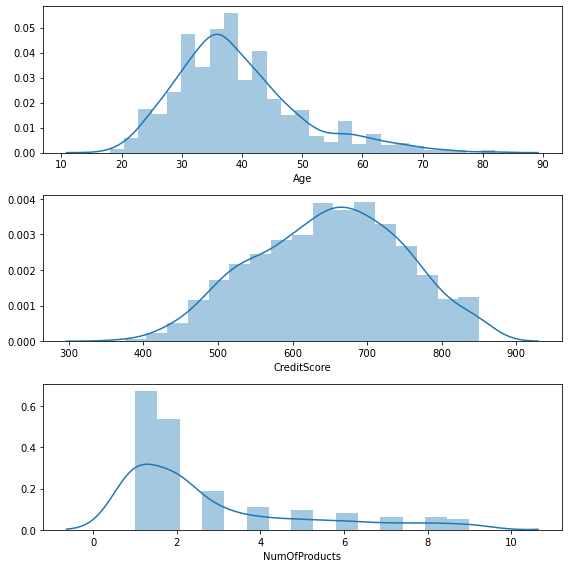

In [21]:
distributions(cluster_data)

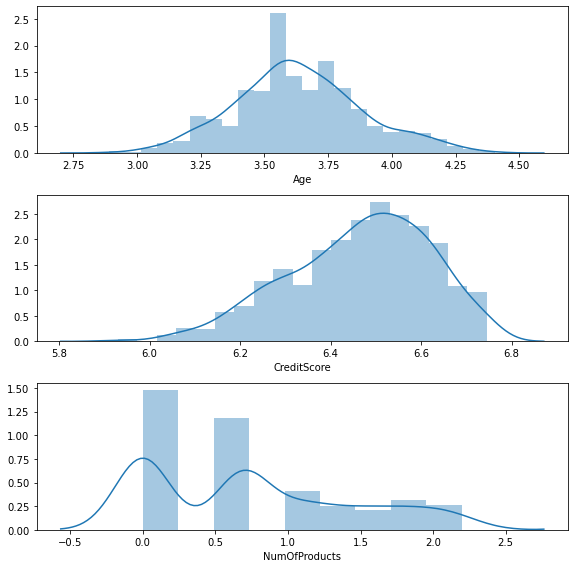

In [22]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

In [23]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

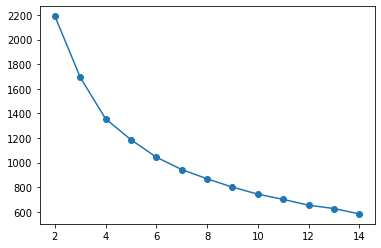

In [24]:
#Among the most important factors when evaluating clusters is their internal consistency, called inertia.
#Inertia is the element which needs to be controlled in order to have sensible and relevant output clusters.
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')
##Insight: As the number of clusters increase inertia decreases.

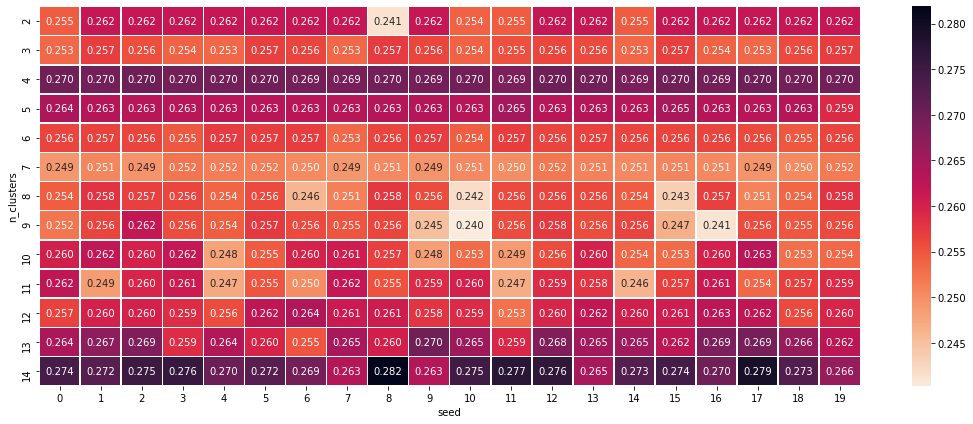

In [25]:
#Silhouette analysis: This is used to determine the optimal distance between each cluster centroid.
#This method helps to identify the number of clusters by looking at the silouhette scores. 
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()
##Insight: 4 Clusters have the highest scores together with 13 and 14 clusters. 
##Insight: As such, I will try with 4 clusters to obtain more insights.

In [26]:
kmeans_sel = KMeans(n_clusters=4, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

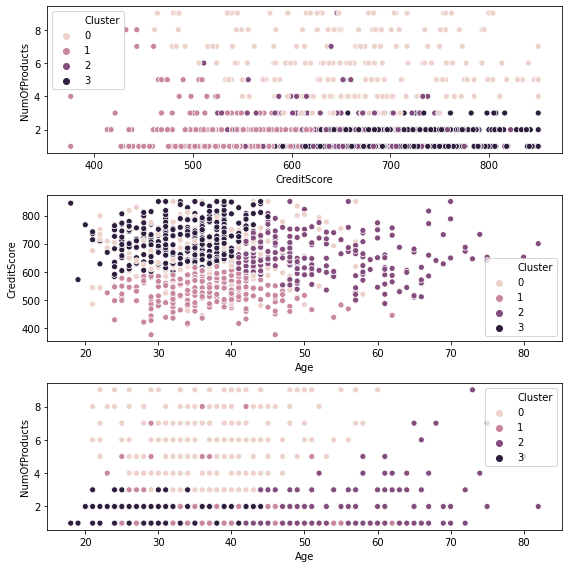

In [27]:
scatters(clustered_data, 'Cluster')
##Insight: The scatterplots seem to indicate that 3 clusters separate clearly, not 4 clusters. 
##Insight: As such I will run the analysis again on 3 clusters.

In [28]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [29]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km
##Insight: Cluster 0: younger customers, average credit score, high no. of products
##Insight: Cluster 1: middle-aged customers, low credit score, low no. of products
##Insight: Cluster 2: younger customers, high credit score, low no. of products

,Age,CreditScore,NumOfProducts
Cluster,,,
0,38.2,651.2,5.5
1,44.2,560.2,1.7
2,36.0,715.8,1.5


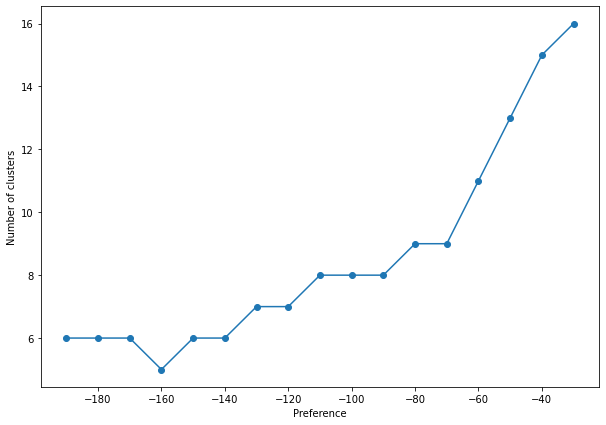

In [30]:
##Clustering with Affinity Propagation.
##This technique is very important as it segments the data without the need to specify the number of clusters.
preferences = np.arange(-30,-200,-10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')

##Insight: As the preferences parameter goes down so does the number of clusters.
##Insight: The minimum is attained for 5 clusters at -160. As such I will check the 5 clusters option

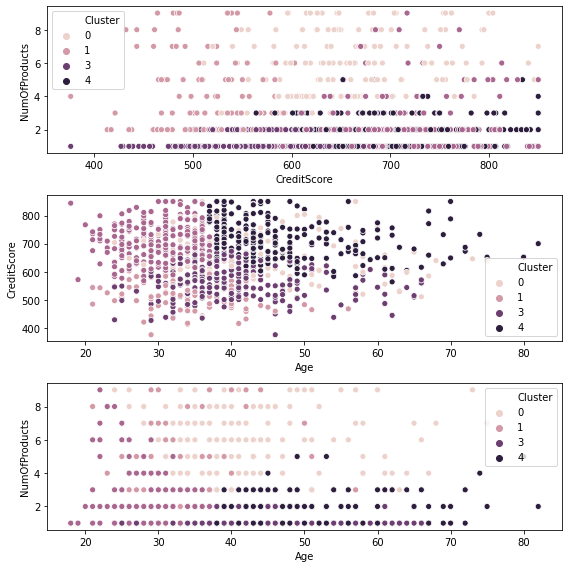

In [31]:
af = AffinityPropagation(preference=-160, damping=0.6, verbose=False).fit(cluster_scaled)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

clustered_data_af = cluster_data.assign(Cluster=labels_af)
scatters(clustered_data_af,'Cluster')

grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)

In [32]:
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_af
##Insight: Cluster 0: middle-aged customers, average credit score, high no. of products
##Insight: Cluster 1: younger customers, low credit score, average no. of products
##Insight: Cluster 2: younger customers, high credit score, low no. of products
##Insight: Cluster 3: middle-aged customers, low credit score, low no. of products
##Insight: Cluster 4: older customers, high credit score, low no. of products

,Age,CreditScore,NumOfProducts
Cluster,,,
0,41.8,665.0,6.1
1,34.8,511.8,4.2
2,30.3,710.6,2.2
3,40.8,564.6,1.2
4,47.7,713.9,1.8
